In [13]:
import pandas as pd
from pathlib import Path

# 1. 确定文件路径（默认在 Project/src/data/aggregated_data.pkl）
file_path = Path("e:/Project/data/aggregated_data.pkl")

# 2. 直接加载
df = pd.read_pickle(file_path)

# 3. 查看基础信息
print(f"总实例数: {len(df)}")
print(df.columns)

# 4. 访问具体数据示例
# 获取第一行数据
first_row = df.iloc[0]

print(f"站点: {first_row['station_id']}, 日期: {first_row['date']}")
print(f"AI 收益: {first_row['profit_ai']}")

# 访问时间序列（它们是 numpy 数组）
pv_real_series = first_row['PV_real']
print(f"实际光伏数据类型: {type(pv_real_series)}, 长度: {len(pv_real_series)}")

总实例数: 10864
Index(['station_id', 'date', 'battery_capacity', 'power_limit', 'charge_type',
       'profit_ai', 'profit_self', 'Daytime', 'Price_purchase', 'Price_sell',
       'PV_forcast', 'PV_real', 'Load_forcast', 'Load_real', 'Battery_dis',
       'Battery_cha', 'Battery_soc'],
      dtype='object')
站点: 5343576, 日期: 2025-08-31
AI 收益: 13.10223388671875
实际光伏数据类型: <class 'numpy.ndarray'>, 长度: 288


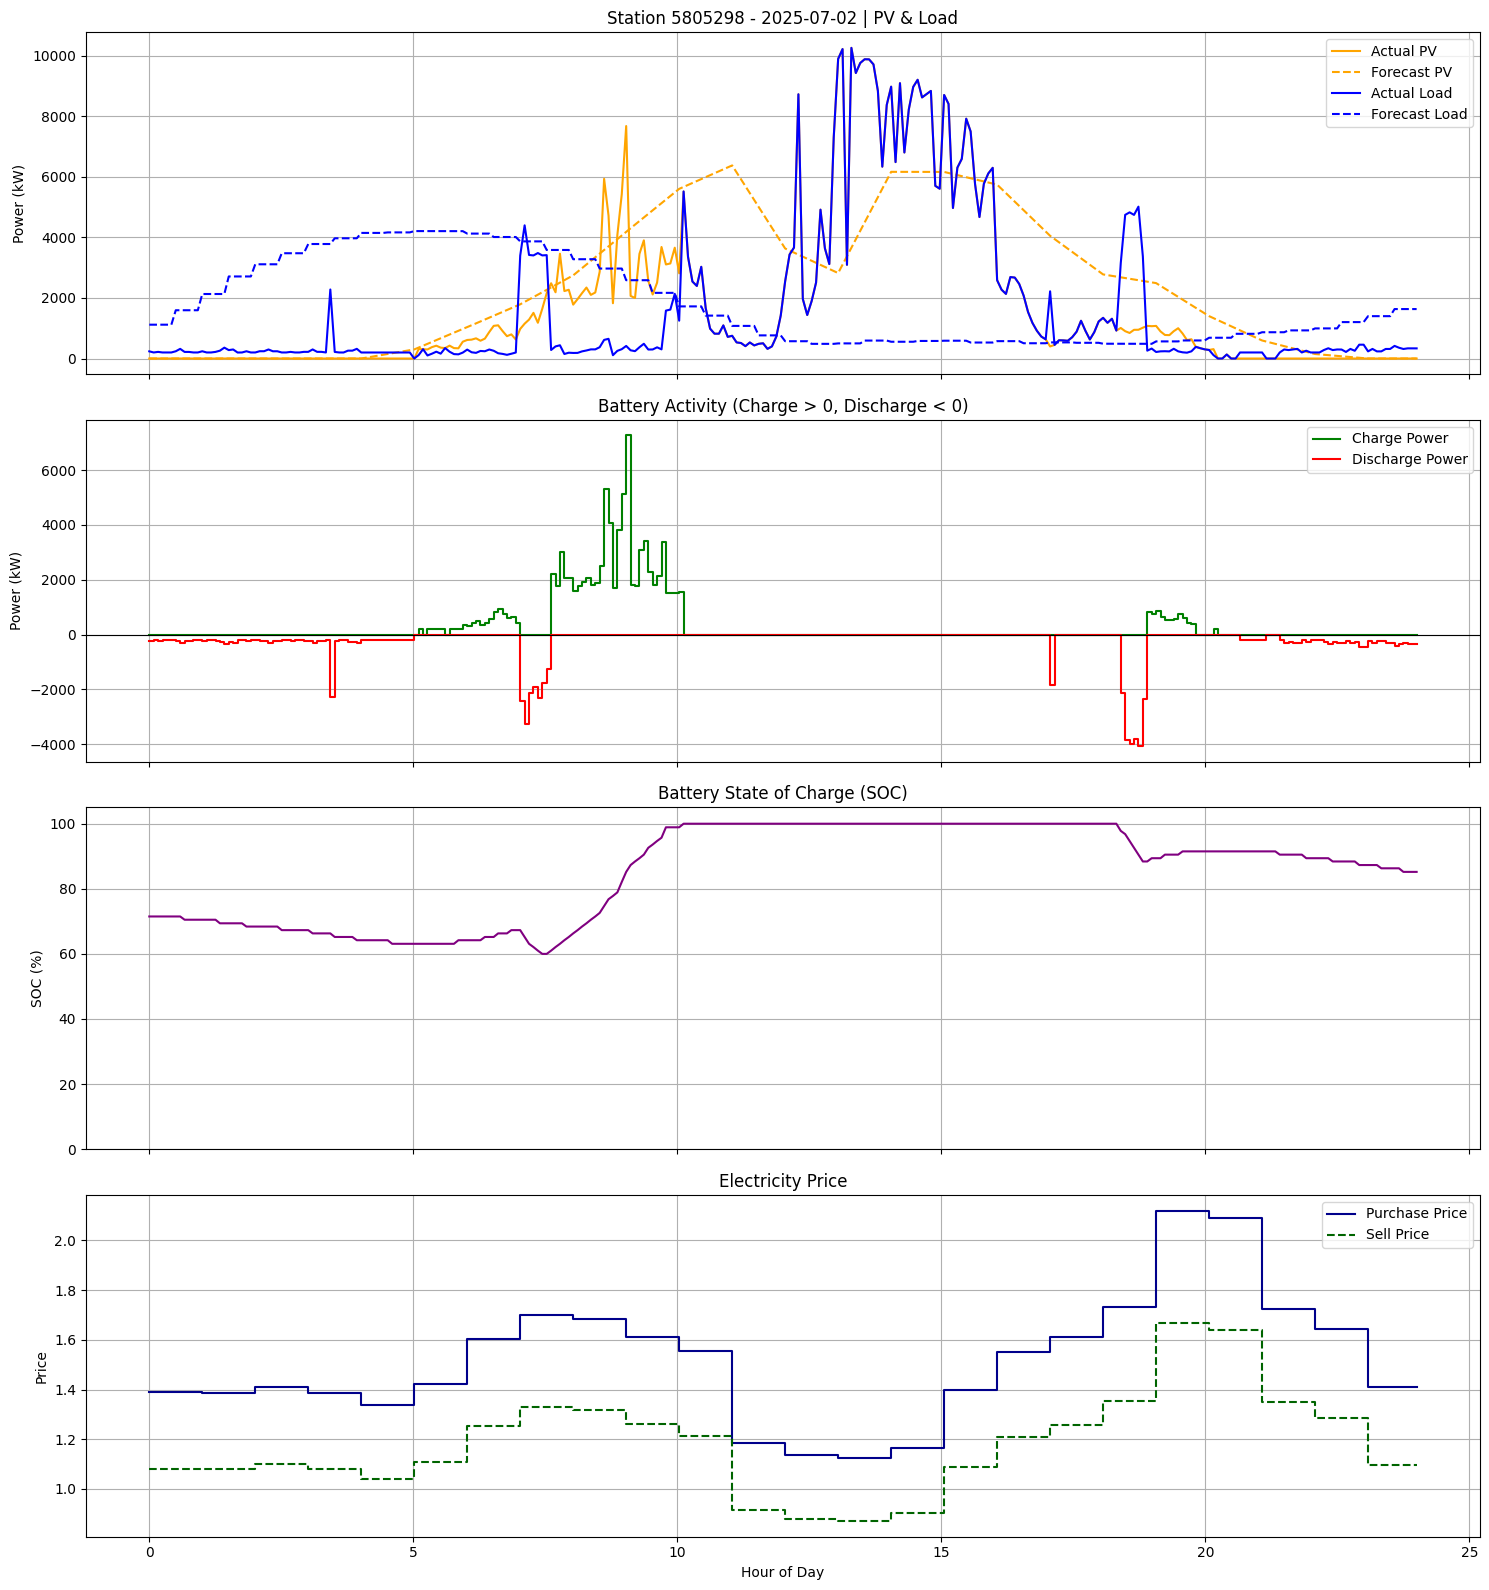

Random Sample Index: 8052
Station Info: ID=5805298, Capacity=16000kWh, Power Limit=010000kW
Profit: AI=55.11, Self=55.07


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 随机选择一行数据
row = df.sample(n=1).iloc[0]
station_id = row['station_id']
date = row['date']

# 创建时间轴（288个点，对应24小时，每5分钟一个点）
time_axis = np.linspace(0, 24, 288)

fig, axes = plt.subplots(4, 1, figsize=(15, 16), sharex=True)

# 1. 绘制光伏和负载数据
axes[0].plot(time_axis, row['PV_real'], label='Actual PV', color='orange')
axes[0].plot(time_axis, row['PV_forcast'], label='Forecast PV', color='orange', linestyle='--')
axes[0].plot(time_axis, row['Load_real'], label='Actual Load', color='blue')
axes[0].plot(time_axis, row['Load_forcast'], label='Forecast Load', color='blue', linestyle='--')
axes[0].set_title(f"Station {station_id} - {date} | PV & Load")
axes[0].set_ylabel("Power (kW)")
axes[0].legend(loc='upper right')
axes[0].grid(True)

# 2. 绘制电池功率 (充电和放电)
axes[1].step(time_axis, row['Battery_cha'], label='Charge Power', color='green', where='post')
axes[1].step(time_axis, -row['Battery_dis'], label='Discharge Power', color='red', where='post')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_title("Battery Activity (Charge > 0, Discharge < 0)")
axes[1].set_ylabel("Power (kW)")
axes[1].legend(loc='upper right')
axes[1].grid(True)

# 3. 绘制电池 SOC
axes[2].plot(time_axis, row['Battery_soc'], label='Battery SOC', color='purple')
axes[2].set_title("Battery State of Charge (SOC)")
axes[2].set_ylabel("SOC (%)")
axes[2].set_ylim(0, 105)
axes[2].grid(True)

# 4. 绘制价格数据
axes[3].step(time_axis, row['Price_purchase'], label='Purchase Price', color='darkblue', where='post')
axes[3].step(time_axis, row['Price_sell'], label='Sell Price', color='darkgreen', where='post', linestyle='--')
axes[3].set_title("Electricity Price")
axes[3].set_xlabel("Hour of Day")
axes[3].set_ylabel("Price")
axes[3].legend(loc='upper right')
axes[3].grid(True)

plt.tight_layout()
plt.show()

# 打印一些静态指标
print(f"Random Sample Index: {row.name}")
print(f"Station Info: ID={station_id}, Capacity={row['battery_capacity']}kWh, Power Limit={row['power_limit']}kW")
print(f"Profit: AI={row['profit_ai']:.2f}, Self={row['profit_self']:.2f}")
